### Data science and Business Analytics (GRIP August 2021)

### Task 3 : EDA ~ Sports 

### Author : Karan Khatri

### Exploratory Data Analysis ( Level - Advance )

### Indian Premier league 

### importing required libararies

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
Data = pd.read_csv('deliveries.csv')
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Shape of datasets

In [4]:
data.shape #matches

(756, 18)

In [5]:
Data.shape #deliveries

(179078, 21)

### Checking null values if their any 

In [6]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
Data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### droping unnecessary columns from both the data set which contains higher null values

In [8]:
data = data.drop(columns=['umpire3'])

In [9]:
cols = ['player_dismissed','dismissal_kind','fielder']

In [10]:
Data = Data.drop(columns=cols)

### filling the NAN values with zero

In [11]:
data = data.fillna(0)

In [12]:
Data = Data.fillna(0)

In [13]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0


In [14]:
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [15]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

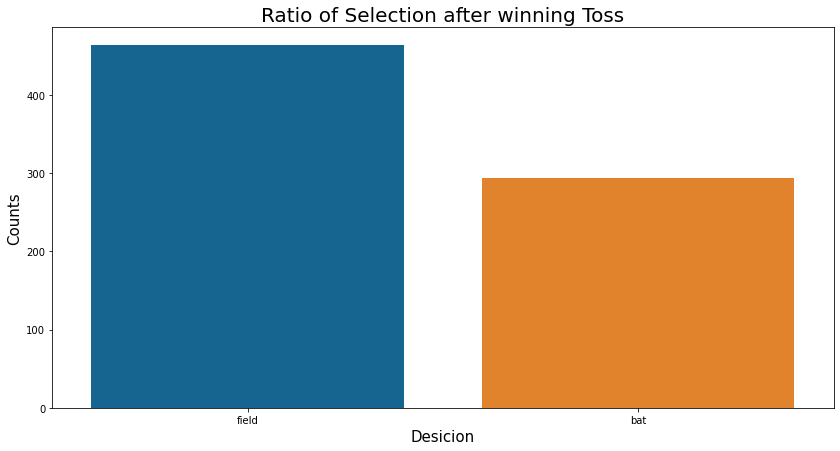

In [16]:
plt.figure(figsize=(14,7))
plt.style.use('tableau-colorblind10')
sns.countplot(data['toss_decision'])
plt.title("Ratio of Selection after winning Toss",fontsize=20)
plt.xlabel("Desicion",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show

In [17]:
wins_per_season = data.groupby("season")['winner'].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        0                               1
Name: winner, Length: 103, dtype: int64

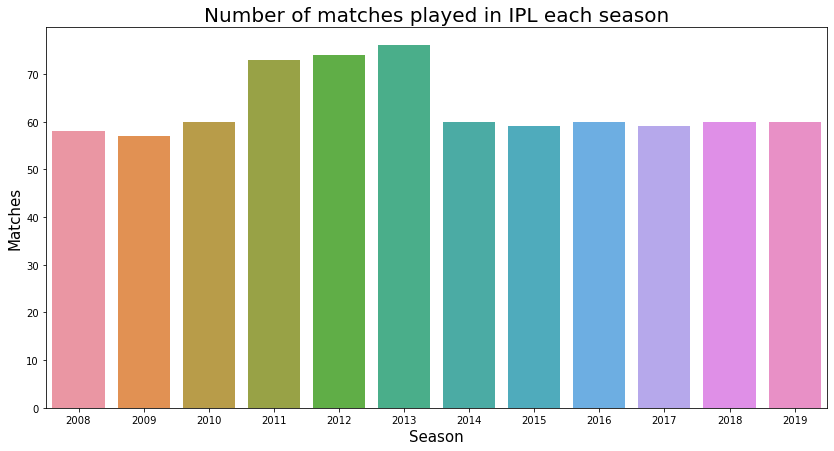

In [18]:
plt.figure(figsize = (14,7))
sns.countplot('season',data=data)
plt.style.use('seaborn-deep')
plt.title("Number of matches played in IPL each season",fontsize=20)
plt.xlabel('Season',fontsize=15)
plt.ylabel("Matches",fontsize=15)
plt.show()

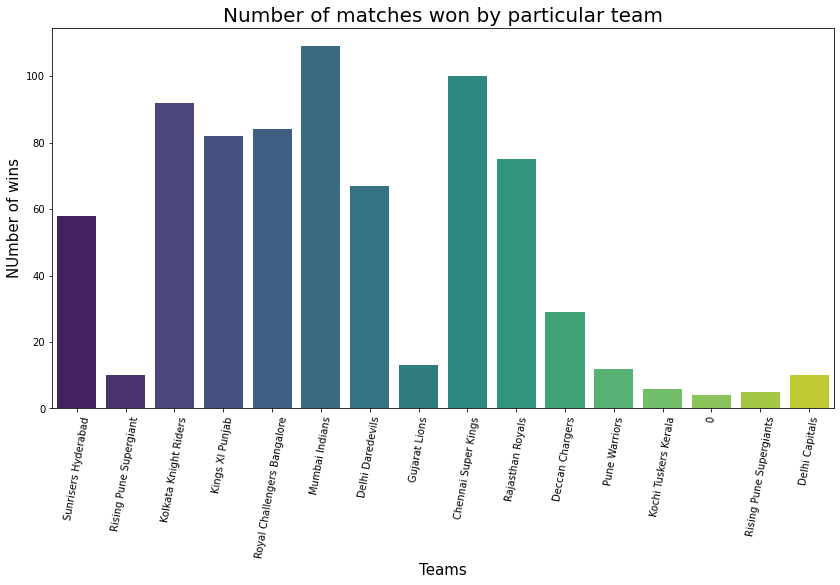

In [19]:
plt.figure(figsize = (14,7))
sns.countplot('winner',data = data,palette='viridis')
plt.style.use('seaborn-notebook')
plt.title("Number of matches won by particular team",fontsize=20)
plt.xticks(rotation=80)
plt.xlabel('Teams',fontsize=15)
plt.ylabel("NUmber of wins",fontsize=15)
plt.show()

In [20]:
data['win_by'] = np.where(data['win_by_runs']>0,'Bat first','Bowl first')

In [21]:
data['win_by'].value_counts()

Bowl first    419
Bat first     337
Name: win_by, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

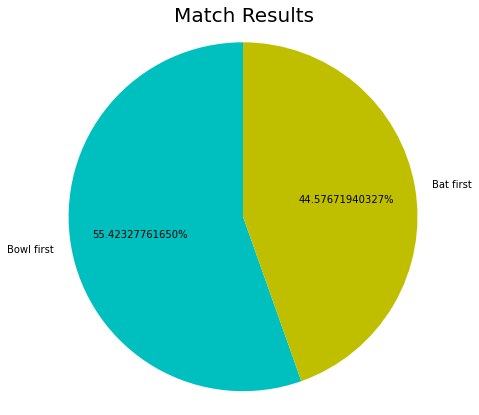

In [22]:
Win = data['win_by'].value_counts()
labels = np.array(Win.index)
size = Win.values
colors = ['c','y']
plt.figure(figsize=(7,7))
plt.pie(size,labels=labels,colors=colors,startangle=90,autopct='%1.11f%%')
plt.title('Match Results',fontsize=20)
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

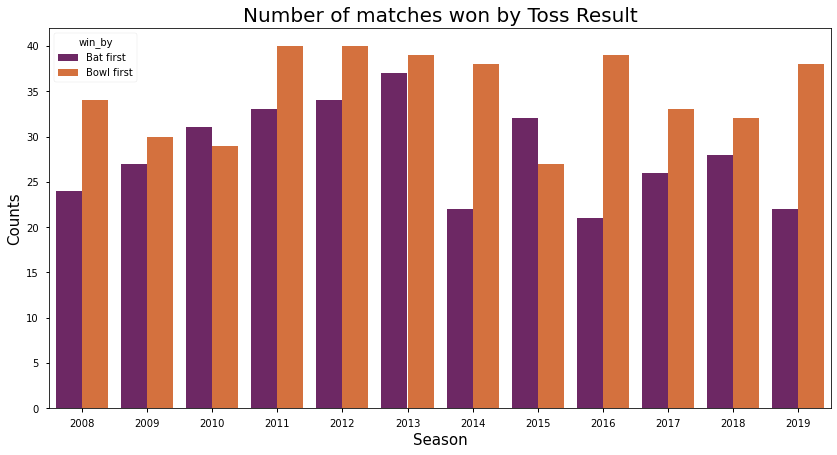

In [23]:
plt.figure(figsize=(14,7))
sns.countplot("season",hue='win_by',data =data,palette='inferno')
plt.title("Number of matches won by Toss Result",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

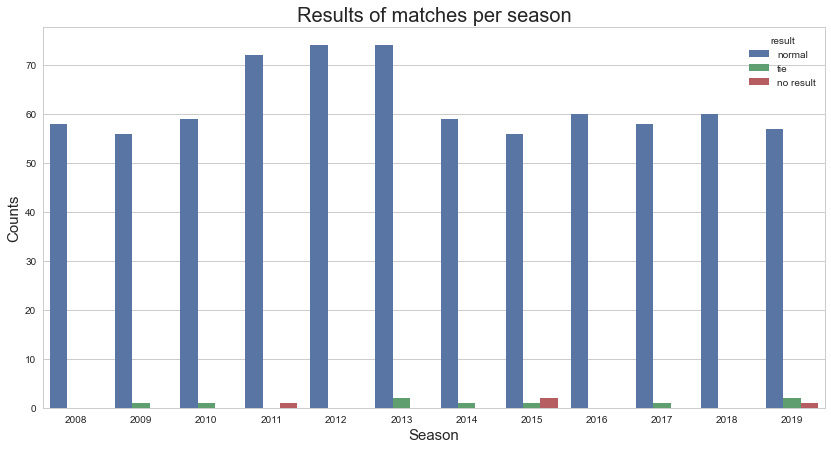

In [24]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
sns.countplot("season",hue='result',data =data)
plt.title("Results of matches per season",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show

### showing the winning team per season wise

In [25]:
final_matches = data.drop_duplicates(subset=['season'],keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### plotting pie chart on toss desicion

<function matplotlib.pyplot.show(close=None, block=None)>

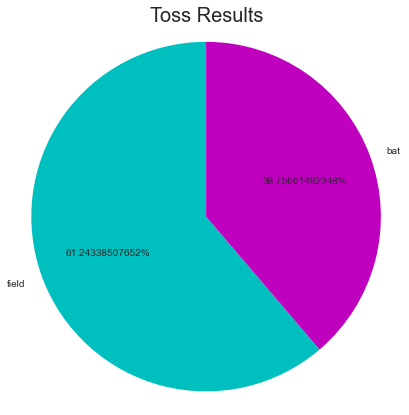

In [26]:
toss = data.toss_decision.value_counts()
labels = np.array(toss.index)
sizes = toss.values
colours = ['c','m']
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colours,autopct='%1.11f%%',startangle=90)
plt.title('Toss Results',fontsize=20)
plt.axis('equal')
plt.show

### plotting pie chart on winning percentage in final

<function matplotlib.pyplot.show(close=None, block=None)>

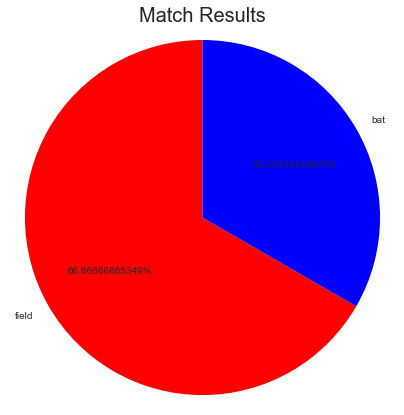

In [56]:
match = final_matches.win_by.value_counts()
label = np.array(toss.index)
sizes = match.values
colours = ['r','b']
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label,colors=colours,autopct='%1.11f%%',startangle=90)
plt.title('Match Results',fontsize=20)
plt.axis('equal')
plt.show

### printing IPLs finals venues and winners along with the number of wins

In [28]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

### number of season won by teams

In [29]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

### printing toss winners , toss desicion and winning team in the final

In [30]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


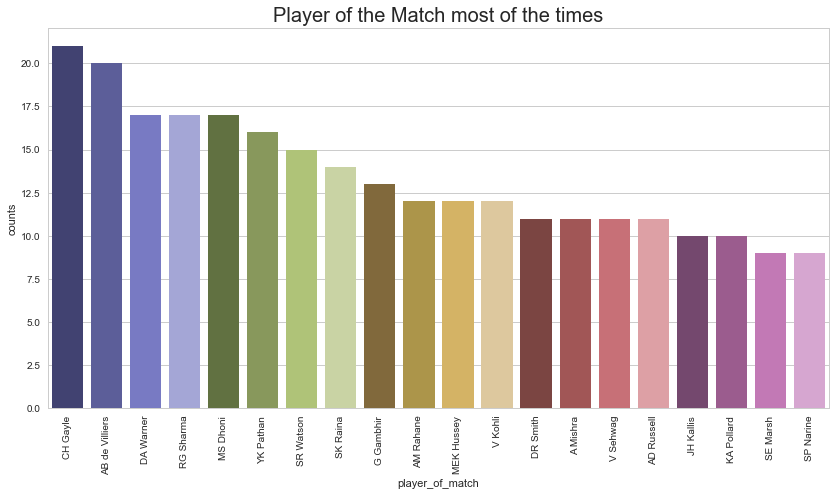

In [55]:
plt.figure(figsize=(14,7))
fav_cities = data['player_of_match'].value_counts().reset_index()
fav_cities.columns = ['player_of_match','counts']
sns.barplot(x='player_of_match',y='counts',data=fav_cities[:20],palette='tab20b')
plt.title("Player of the Match most of the times",fontsize=20)
plt.xticks(rotation=90)
plt.show()

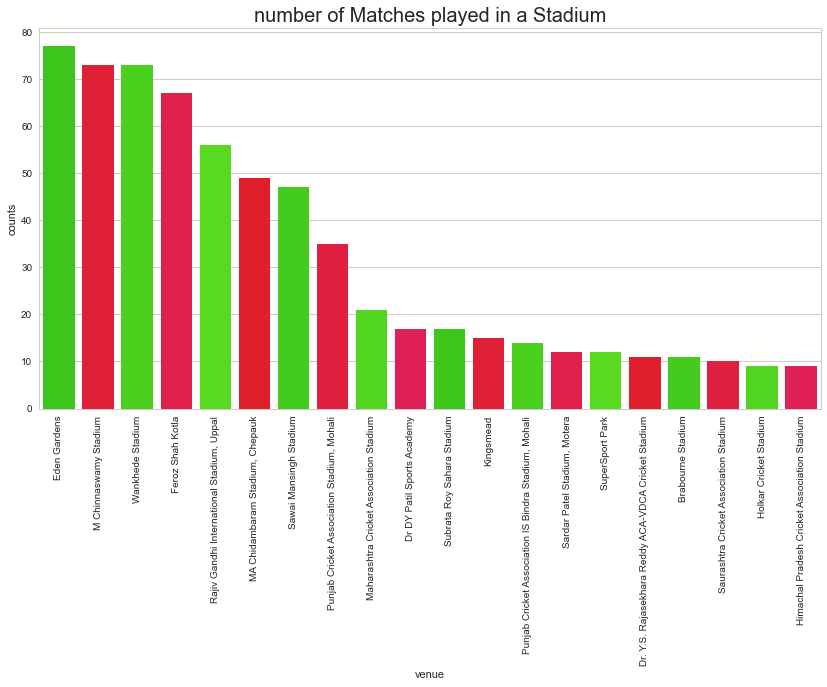

In [54]:
plt.figure(figsize=(14,7))
fav_ground = data['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','counts']
sns.barplot(x='venue',y='counts',data=fav_ground[:20],palette='prism')
plt.title("number of Matches played in a Stadium",fontsize=20)
plt.xticks(rotation=90)
plt.show()

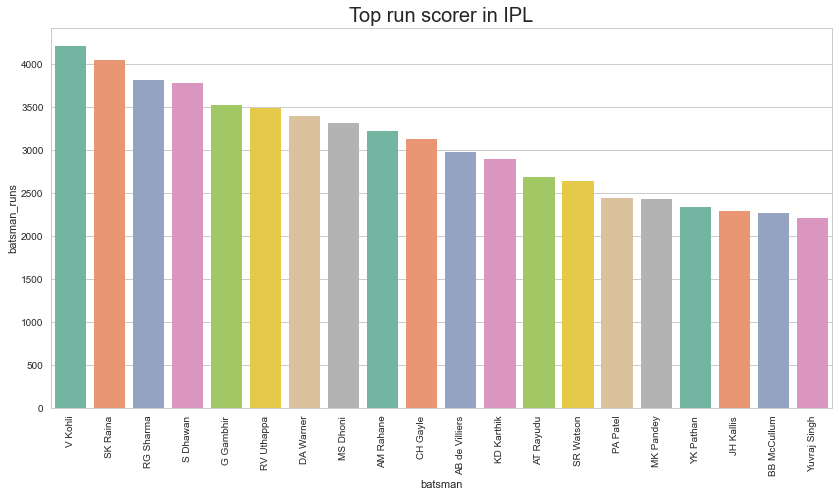

In [58]:
plt.figure(figsize=(14,7))
fav_ground = Data['batsman'].value_counts().reset_index()
fav_ground.columns = ['batsman','batsman_runs']
sns.barplot(x='batsman',y='batsman_runs',data=fav_ground[:20],palette='Set2')
plt.title("Top run scorer in IPL",fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [60]:
high_scores = Data.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#reset_index() converts the obtained series into a dataframe
high_scores = high_scores[high_scores['total_runs']>=200]
#n_largest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232
